In [ ]:
import numpy as np
import pandas as pd
from tensorflow.python.keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.layers import Dense
from statsmodels.tsa.stattools import pacf
import matplotlib.pyplot as plt

0     96.7
1    104.3
2    116.7
3     92.8
4    141.7
Name: 3, dtype: float64
3205    56.4
3206    54.1
3207    37.9
3208    51.5
3209    20.5
Name: 3, dtype: float64


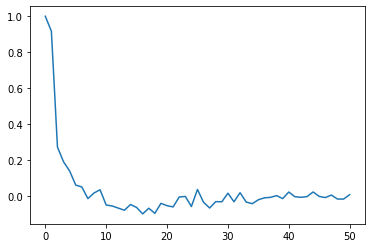

In [18]:

url = "http://www.sidc.be/silso/INFO/snmtotcsv.php"
data = pd.read_csv (url,sep =";")
loc = "Monthly Sunspots.csv"
data . to_csv (loc , index = False )
data_csv = pd. read_csv (loc , header = None )
yt= data_csv . iloc [0:3210 ,3]
x_pacf=pacf(yt ,nlags=50, method='ols')
plt.plot(x_pacf)


In [69]:
yt_1 =yt. shift (20)
yt_2 =yt. shift (30)
yt_3 =yt. shift (60)
yt_4 =yt. shift (90)
yt_5 =yt. shift (100)
data =pd. concat ([yt ,yt_1 , yt_2 ,yt_3 ,yt_4 ,yt_5 ], axis =1)
data . columns = ['yt', 'yt_1', 'yt_2', 'yt_3', 'yt_4', 'yt_5']
data = data . dropna ()  # 除去NULL，因为序列的起始点是没有历史的
y = data ['yt']
x = data [['yt_1', 'yt_2', 'yt_3', 'yt_4', 'yt_5']]
x


,yt_1,yt_2,yt_3,yt_4,yt_5
100,29.7,22.0,99.5,264.3,96.7
101,39.5,7.0,66.0,142.0,104.3
102,11.3,17.0,130.7,122.2,116.7
103,33.3,18.7,48.8,126.5,92.8
104,20.8,11.3,45.2,148.7,141.7
...,...,...,...,...,...
3205,102.9,91.8,48.3,0.3,1.5
3206,100.2,54.5,78.6,1.2,2.8
3207,106.9,114.4,76.1,4.2,17.3
3208,130.0,113.9,58.2,6.6,4.1


In [88]:
# from keras.preprocessing.sequence import TimeseriesGenerator
# window=50
# tg = TimeseriesGenerator(yt, yt, length=window, batch_size=1)
# len(tg)
# # for i in range(len(tg)):
# #     xx, yx = tg[i]
# #     print('%s => %s' % (xx, yx))
# tg[:]

TypeError: unsupported operand type(s) for *: 'int' and 'slice'

In [71]:
from sklearn import preprocessing
scaler_x = preprocessing . MinMaxScaler(feature_range=(-1, 1))
x = np. array(x). reshape((len(x), 5))
x = scaler_x . fit_transform(x)
scaler_y = preprocessing . MinMaxScaler(
    feature_range=(-1, 1))
y = np. array(y). reshape((len(y), 1))
y = scaler_y . fit_transform(y)
train_end = 3000
x_train = x[0: train_end, ]
x_test = x[train_end + 1:3100, ]
y_train = y[0: train_end]
y_test = y[train_end + 1:3100]
print(x_train . shape)
x_train = x_train . reshape(x_train . shape + (1,))
x_test = x_test . reshape(x_test . shape + (1,))
print(x_train . shape)  # (3042, 5, 1)
x

(3000, 5)
(3000, 5, 1)


array([[-0.85082873, -0.88950276, -0.50025113,  0.32747363, -0.51431441],
       [-0.80160723, -0.96484179, -0.66850829, -0.28679056, -0.47614264],
       [-0.9432446 , -0.91461577, -0.34354596, -0.38623807, -0.41386238],
       ...,
       [-0.46308388, -0.42541436, -0.61778001, -0.97890507, -0.91310899],
       [-0.34706178, -0.42792567, -0.70768458, -0.96685083, -0.97940733],
       [-0.54796585, -0.37619287, -0.71823204, -0.9949774 , -0.98543446]])

Epoch 1/3
3000/3000 [==============================] - 16s 4ms/step - loss: 0.1267
Epoch 2/3
3000/3000 [==============================] - 13s 4ms/step - loss: 0.1145
Epoch 3/3
3000/3000 [==============================] - 13s 4ms/step - loss: 0.1062
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_6 (ModuleWra  (1, 4)                   96        
 pper)                                                           
                                                                 
 dense_5 (Dense)             (1, 1)                    5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
None
99/99 [==============================] - 0s 3ms/step - loss: 0.0568
in train MSE =  0.0982
in test MSE =  0.0568
4/4 [==============

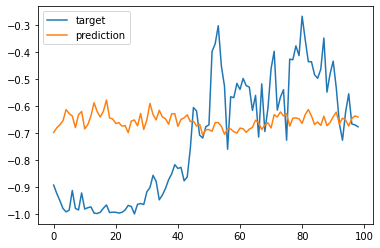

In [72]:
from tensorflow.python.keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.layers import Dense
# import torch.nn as nn
seed =2019
np.random.seed( seed )

model = Sequential()
model .add(LSTM (units =4, activation = 'tanh', recurrent_activation ='hard_sigmoid',input_shape = (5 , 1)))
model .add(Dense (units =1, activation = 'linear'))
model . compile ( loss ='mean_squared_error',optimizer = 'rmsprop')
model .fit( x_train , y_train , batch_size =1, epochs =3 , shuffle = True ) ## shuffle matters！！ 
print(model . summary ())
'''
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
lstm_16 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 5         
=================================================================
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
None
'''

score_train = model.evaluate (x_train , y_train , batch_size =1)
score_test = model.evaluate (x_test , y_test , batch_size =1)
print ("in train MSE = ", round( score_train,4))
print ("in test MSE = ", round( score_test ,4))

pred = model.predict(x_test)
# pred1 = scaler_y.inverse_transform(np.array(pred1).reshape((len(pred1), 1)))

plt.plot(y_test)
plt.plot(pred)
plt.legend(['target','prediction'])


4/4 [==============================] - 0s 4ms/step


3110

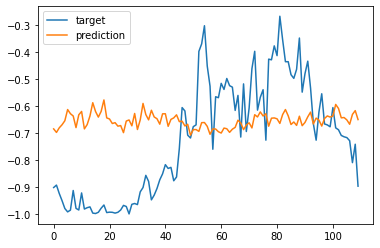

In [75]:

x_test = x[3000:3288, ]
x_test = x_test . reshape(x_test . shape + (1,))
y_test = y[3000:3288, ]
# y_test = y_test . reshape(y_test . shape + (1,))
pred = model.predict(x_test)

plt.plot(y_test)
plt.plot(pred)
plt.legend(['target','prediction'])
len(x)

Epoch 1/10
3042/3042 [==============================] - 16s 4ms/step - loss: 0.0268
Epoch 2/10
3042/3042 [==============================] - 13s 4ms/step - loss: 0.0189
Epoch 3/10
3042/3042 [==============================] - 16s 5ms/step - loss: 0.0189
Epoch 4/10
3042/3042 [==============================] - 16s 5ms/step - loss: 0.0188
Epoch 5/10
3042/3042 [==============================] - 19s 6ms/step - loss: 0.0188
Epoch 6/10
3042/3042 [==============================] - 16s 5ms/step - loss: 0.0189
Epoch 7/10
3042/3042 [==============================] - 13s 4ms/step - loss: 0.0190
Epoch 8/10
3042/3042 [==============================] - 14s 5ms/step - loss: 0.0191
Epoch 9/10
3042/3042 [==============================] - 13s 4ms/step - loss: 0.0192
Epoch 10/10
3042/3042 [==============================] - 15s 5ms/step - loss: 0.0193
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 modu

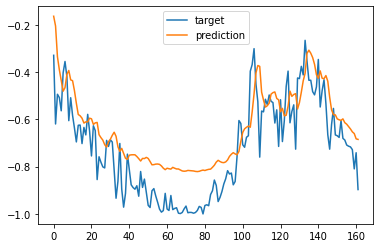

In [36]:
from tensorflow.python.keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.layers import Dense
# import torch.nn as nn
seed =2019
np.random.seed( seed )

model = Sequential()
model .add(LSTM (units =4, activation = 'tanh', recurrent_activation ='hard_sigmoid',input_shape = (5 , 1)))
model .add(Dense (units =1, activation = 'linear'))
model . compile ( loss ='mean_squared_error',optimizer = 'rmsprop')
model .fit( x_train , y_train , batch_size =1, epochs =10 , shuffle = False ) ## shuffle matters！！ 
print(model . summary ())
'''
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
lstm_16 (LSTM)               (None, 4)                 96        
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 5         
=================================================================
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
None
'''

score_train = model.evaluate (x_train , y_train , batch_size =1)
score_test = model.evaluate (x_test , y_test , batch_size =1)
print ("in train MSE = ", round( score_train,4))
print ("in test MSE = ", round( score_test ,4))

pred = model.predict(x_test)
# pred1 = scaler_y.inverse_transform(np.array(pred1).reshape((len(pred1), 1)))

plt.plot(y_test)
plt.plot(pred)
plt.legend(['target','prediction'])
